1. 데이터 읽기

In [ ]:
import pandas as pd
df = pd.read_csv("news.csv")

2. 전처리 및 명사 추출

In [ ]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm



In [ ]:
print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거  # how = 'any'은 조건 인데 행에서 하나 이상의 null 값이 있는 경우 해당 행을 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인



False
False


In [ ]:
train_data

,label,articles
0,0,독일 자동차 부품회사 보쉬(BOSCH)가 'CES 2019'에서 통합 서비스를 제공...
1,0,- 황금 돼지 기운을 느낄 수 있는 ‘돼지투어’- 한국관광공사 1월 추천 가볼 만한...
2,0,"[암 환자는 내 곁에 있다 ④] 암 환자, 치료의 대상 아닌 사회의 일원[사진=im..."
3,0,새해 금주 목표 성공을 위해서는 무작정 술을 참기보다 단기 목표를 먼저 세우고 기간...
4,0,"빅토리아시크릿의 몰락 브라렛 판매량 3049% 급증속옷업계들, 앞다퉈 브라렛 내놔남..."
...,...,...
195,0,경제와 문화의 가교 한경[ 김희경 기자 ] 스위스 중부에 있는 할빌 마을에서 지난 ...
196,0,맛칼럼니스트 황교익씨맛칼럼니스트 황교익씨(57)가 4일 “음식평론가인 맛칼럼니스트가...
197,0,"[머니투데이 배영윤 기자] ['삼일운동 100주년 간송특별전, 대한콜랙숀' 4일~3..."
198,0,‘가슴 쥐어짜는 듯한 통증’ 지속되면즉시 관상동맥중재술 가능 병원으로본격적인 추위가...


In [ ]:
train_data.articles

0      독일 자동차 부품회사 보쉬(BOSCH)가 'CES 2019'에서 통합 서비스를 제공...
1      - 황금 돼지 기운을 느낄 수 있는 ‘돼지투어’- 한국관광공사 1월 추천 가볼 만한...
2      [암 환자는 내 곁에 있다 ④] 암 환자, 치료의 대상 아닌 사회의 일원[사진=im...
3      새해 금주 목표 성공을 위해서는 무작정 술을 참기보다 단기 목표를 먼저 세우고 기간...
4      빅토리아시크릿의 몰락 브라렛 판매량 3049% 급증속옷업계들, 앞다퉈 브라렛 내놔남...
                             ...                        
195    경제와 문화의 가교 한경[ 김희경 기자 ] 스위스 중부에 있는 할빌 마을에서 지난 ...
196    맛칼럼니스트 황교익씨맛칼럼니스트 황교익씨(57)가 4일 “음식평론가인 맛칼럼니스트가...
197    [머니투데이 배영윤 기자] ['삼일운동 100주년 간송특별전, 대한콜랙숀' 4일~3...
198    ‘가슴 쥐어짜는 듯한 통증’ 지속되면즉시 관상동맥중재술 가능 병원으로본격적인 추위가...
199    16~27일, 2월 13~24일 ‘봄여름가을겨울 30주년 소극장 콘서트’ 김종진이 ...
Name: articles, Length: 200, dtype: object

In [ ]:
train_data['articles'] = train_data['articles'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True) # 한글과 공백 이외의 모든 문자를 찾아서 빈 문자열로 대체하여 제거

In [ ]:
# # 작동 nono
# ### 위에 있는거 알려고하는 예시라서 필요없음
# import pandas as pd

# # 데이터프레임 생성
# data = {'text': ['apple', 'banana', 'cat', 'dog']}
# df = pd.DataFrame(data)
# df
# # 'text' 열의 문자열에서 'a'를 'x'로 대체
# df['text'] = df['text'].str.replace('a', 'x')

# # 변경된 데이터프레임 출력
# print(df)

     text
0   xpple
1  bxnxnx
2     cxt
3     dog


In [ ]:
# # 작동 nono
# ### 위에 있는거 알려고하는 예시라서 필요없음
# import re

# original_text = "Hello, 안녕하세요! This is a test 123."
# cleaned_text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", original_text)
# print(cleaned_text)

 안녕하세요     


In [ ]:
# # 작동 nono
# ### 위에 있는거 알려고하는 예시라서 필요없음
# import pandas as pd

# # 데이터프레임 생성
# data = {'text': ['안녕하세요', 'Hello 123', '반갑습니다!']}
# df = pd.DataFrame(data)
# print("\n원본 데이터프레임:\n" , df['text'])

# # 'text' 열의 문자열에서 한글과 공백을 제외한 모든 문자를 제거
# df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True) # regex=True는 정규 표현식을 사용하여 문자열을 치환할 때 정규 표현식을 활성화

# # 변경된 데이터프레임 출력
# print("\n변경된 데이터프레임:\n" , df['text'])


원본 데이터프레임:
 0        안녕하세요
1    Hello 123
2       반갑습니다!
Name: text, dtype: object

변경된 데이터프레임:
 0    안녕하세요
1         
2    반갑습니다
Name: text, dtype: object


In [ ]:
train_data.articles

0      독일 자동차 부품회사 보쉬가  에서 통합 서비스를 제공할 수 있는 무인 전기 셔틀 ...
1       황금 돼지 기운을 느낄 수 있는 돼지투어 한국관광공사 월 추천 가볼 만한 곳아이들...
2      암 환자는 내 곁에 있다  암 환자 치료의 대상 아닌 사회의 일원사진옆집 아저씨 암...
3      새해 금주 목표 성공을 위해서는 무작정 술을 참기보다 단기 목표를 먼저 세우고 기간...
4      빅토리아시크릿의 몰락 브라렛 판매량  급증속옷업계들 앞다퉈 브라렛 내놔남성 속옷 사...
                             ...                        
195    경제와 문화의 가교 한경 김희경 기자  스위스 중부에 있는 할빌 마을에서 지난 일 ...
196    맛칼럼니스트 황교익씨맛칼럼니스트 황교익씨가 일 음식평론가인 맛칼럼니스트가 음식 방송...
197    머니투데이 배영윤 기자 삼일운동 주년 간송특별전 대한콜랙숀 일월일 개최 간송미술관 ...
198    가슴 쥐어짜는 듯한 통증 지속되면즉시 관상동맥중재술 가능 병원으로본격적인 추위가 시...
199    일 월 일 봄여름가을겨울 주년 소극장 콘서트 김종진이 공연마다 다른 특별게스트 초대...
Name: articles, Length: 200, dtype: object

In [ ]:
lst1 = [ ["첫", "번째", "뉴스"], ["두", "번째", "뉴스"]]
lst2 = []
lst2.append( lst1[0] )
lst2
#lst1의 각 값(=리스트)을 출력
for i in lst1:
     print(i)

[ i for i in lst1]

['첫', '번째', '뉴스']
['두', '번째', '뉴스']


[['첫', '번째', '뉴스'], ['두', '번째', '뉴스']]

In [ ]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', 'ㅋㅋ',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(train_data['articles']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

100%|██████████| 200/200 [00:37<00:00,  5.37it/s]


200

In [ ]:
tokenized_data  #각 신문기사에서 나온 명사로 구성된 리스트들의 리스트

3. 워드클라우드 표현을 위해 토큰 결과에서 중복 제거 후 문자열로 변경

In [ ]:
words = ""
for q in tokenized_data:
  for v in q: #각 신문기사의 명사들에 대해서
    if v not in words:
        words = words + " " + v

- 워드클라우드 (malgun.ttf를 업로드 필요)

In [ ]:
!unzip malgun.zip

Archive:  malgun.zip
  inflating: malgun.ttf              


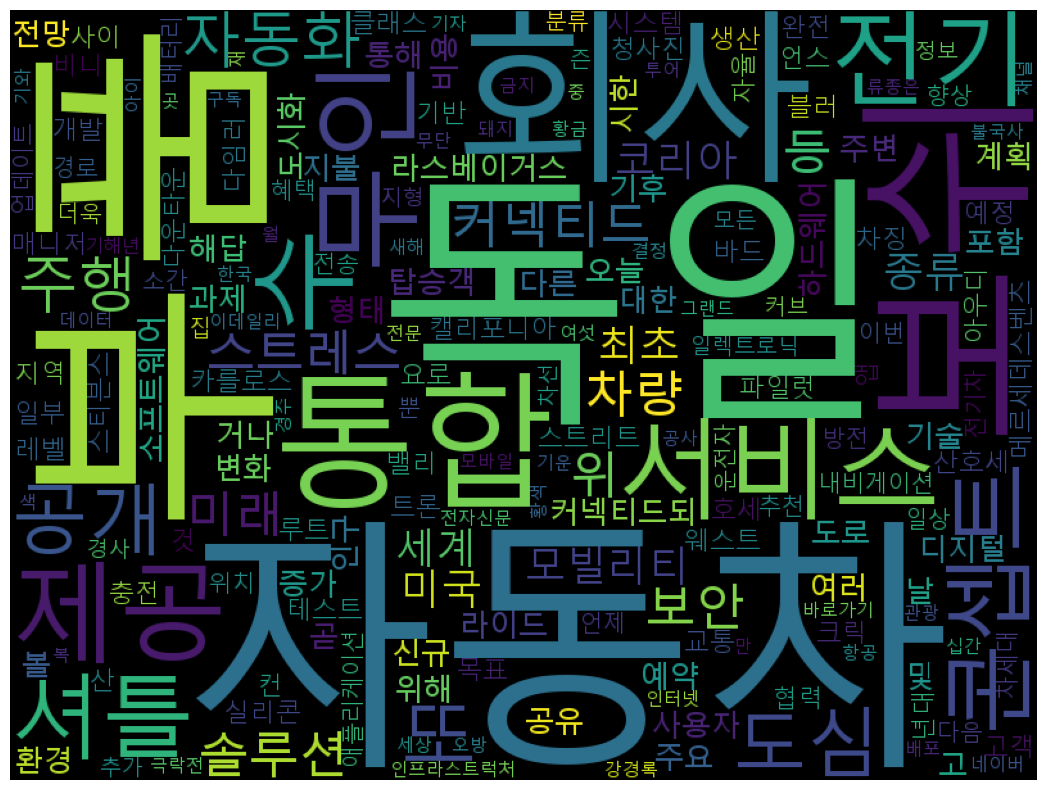

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#malgun.ttf를 업로드
wordcloud = WordCloud(font_path='malgun.ttf', background_color = "black", width = 800, height = 600).generate(words)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()